# Word Frequencies in Tweets – My Learning Notes

This notebook shows how to build a word frequency dictionary for sentiment analysis, using custom functions and clear explanations. All code is written for learning and sharing on GitHub.

## 1. Setup

We use NLTK's Twitter samples, plus matplotlib and numpy for visualization and data handling.

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
import re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Load Data

We load positive and negative tweets, then concatenate them.

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets = all_positive_tweets + all_negative_tweets
print(f"Number of tweets: {len(tweets)}")

Number of tweets: 10000


## 3. Create Labels

We create a numpy array: 1 for positive, 0 for negative.

In [3]:
labels = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

## 4. Python Dictionaries – Quick Ref

Dictionaries are key for NLP feature extraction.

```python
d = {'key1': 1, 'key2': 2}
d['key3'] = -5
print(d.get('key7', -1))  # -1 if not found
```

## 5. Custom Preprocessing Function

This function cleans, tokenizes, removes stopwords, and stems a tweet.

In [4]:
def process_tweet_custom(tweet):
    # Remove RT, URLs, and hashtags (keep the word)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    # Tokenize
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)
    # Remove stopwords and punctuation
    sw = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in sw and t not in string.punctuation]
    # Stemming
    stemmer = PorterStemmer()
    return [stemmer.stem(t) for t in tokens]

## 6. Custom build_freqs Function

This function builds a dictionary of word frequencies for each sentiment.

In [5]:
def build_freqs_custom(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet_custom(tweet):
            pair = (word, int(y))
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs

## 7. Build the Frequency Dictionary

Let's use our custom functions to build the frequency dictionary and inspect it.

In [6]:
freqs = build_freqs_custom(tweets, labels)
print(f'type(freqs) = {type(freqs)}')
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13140


## 8. Table of Word Counts

Let's select some words and build a table of their positive and negative counts.

In [7]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
data = []
for word in keys:
    pos = freqs.get((word, 1), 0)
    neg = freqs.get((word, 0), 0)
    data.append([word, pos, neg])
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

## 9. Visualizing Word Frequencies

We use a scatter plot (log scale) to visualize the word counts. The red line divides positive and negative areas.

c:\Users\Dell\OneDrive\Desktop\KaranCodes\Goal-to-be-ML-Engineer-2026\ML-DL\Deep-Learning-Journey\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


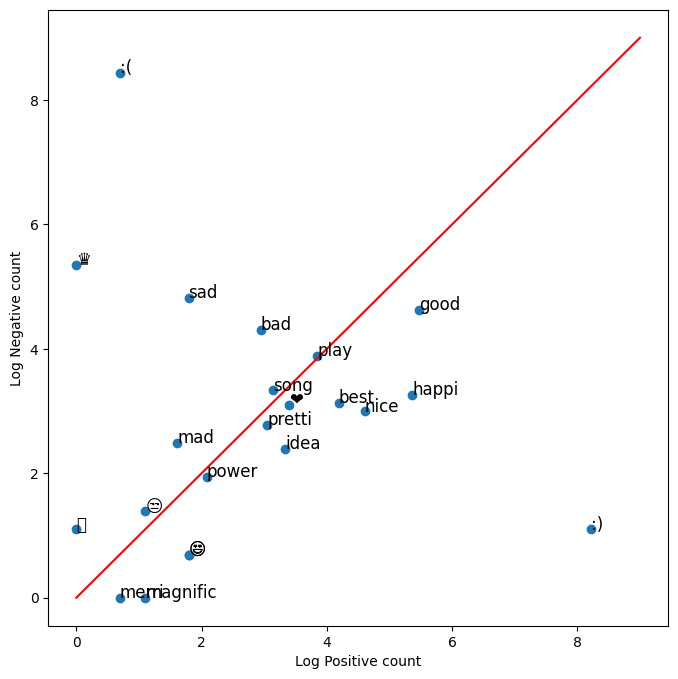

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
x = np.log([x[1] + 1 for x in data])
y = np.log([x[2] + 1 for x in data])
ax.scatter(x, y)
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")
for i in range(len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
ax.plot([0, 9], [0, 9], color='red')
plt.show()

## 10. Takeaways

- Emoticons like :) and :( are strong sentiment signals—don't remove them in preprocessing.
- Dictionaries are fast and flexible for NLP feature extraction.
- Custom functions make your workflow reproducible and easy to share.
- This frequency dictionary is a foundation for feature engineering in sentiment analysis.